<a href="https://colab.research.google.com/github/pradeepkudupudi/IIITH/blob/main/regularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.6774 - loss: 1.6366 - val_accuracy: 0.1692 - val_loss: 4.1759
Epoch 2/30
  1/421 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9375 - loss: 0.6622

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.6622 - val_accuracy: 0.1710 - val_loss: 4.1601
Epoch 3/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9410 - loss: 0.6668 - val_accuracy: 0.9853 - val_loss: 0.4577
Epoch 4/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.4790 - val_accuracy: 0.9858 - val_loss: 0.4567
Epoch 5/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9593 - loss: 0.5217 - val_accuracy: 0.9880 - val_loss: 0.3701
Epoch 6/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.3726 - val_accuracy: 0.9880 - val_loss: 0.3703
Epoch 7/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9697 - loss: 0.4136 - val_accuracy: 0.9900 - val_loss: 0.2949
Epoch 8/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.3175 - val_accuracy: 0.9898 - val_loss: 0.2952
Epoch 9/30
421/421 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9759 - loss: 0.3289 - val_accuracy: 0.989

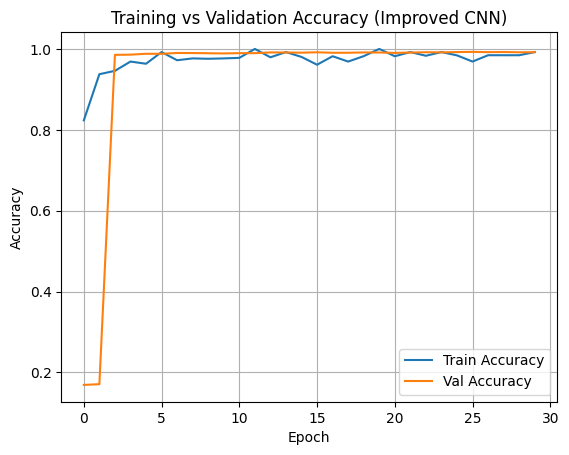

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Build improved regularized CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a tuned learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=30,
                    validation_data=(X_val, y_val), # Use validation_data instead of validation_split
                    steps_per_epoch=X_train.shape[0] // 128,
                    verbose=1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy (Improved Regularized CNN):", test_acc)

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy (Improved CNN)")
plt.legend()
plt.grid(True)
plt.show()